# AirBNB Europa



In [76]:
from pathlib import Path

import csv
import time
import re

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns


%matplotlib inline

## Configuración

Fuente de datos para Europa https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset


In [77]:
data_folder = Path().cwd().parent / 'data'

europe_file = data_folder / 'airbnb_europe' / 'Aemf1.csv'

## Carga de datos

### Datos Europa

In [78]:
df = pd.read_csv(europe_file)

df.shape

(41714, 19)

## EDA

### Descripcion de los datos

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [80]:
df.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [81]:
df['City'].value_counts()

Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: City, dtype: int64

In [82]:
df['Day'].value_counts()

Weekday    20886
Weekend    20828
Name: Day, dtype: int64

In [83]:
df['Room Type'].value_counts()

Entire home/apt    28264
Private room       13134
Shared room          316
Name: Room Type, dtype: int64

### Limpieza de datos

In [84]:
city_mapping = {
    'Rome': 0,
    'Paris': 1,
    'Lisbon': 2,
    'Athens': 3,
    'Budapest': 4,
    'Vienna': 5,
    'Barcelona': 6,
    'Berlin': 7,
    'Amsterdam': 8
}
df['City'] = df['City'].map(city_mapping)

In [85]:
day_mapping = {
    "Weekday": 0,
    "Weekend": 1,
}

df['Day'] = df['Day'].map(day_mapping)

In [86]:
room_type_mapping = {
    "Entire home/apt": 0,
    "Private room": 1,
    "Shared room": 2,
}

df['Room Type'] = df['Room Type'].map(room_type_mapping)

### Matriz de Correlación

In [87]:


corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
City,1.000000,0.096945,-0.027947,0.136282,0.019681,0.135272,-0.095715,0.008382,-0.016266,-0.086485,0.003918,0.055011,-0.001916,0.063101,0.052280,-0.318904,0.088075,-0.491312,-0.181498
Price,0.096945,1.000000,0.011076,-0.156681,-0.038231,-0.149694,0.179969,-0.040391,-0.055322,0.014206,0.003987,0.016069,0.206687,-0.052462,-0.038989,0.168785,0.270958,0.113171,0.219385
Day,-0.027947,0.011076,1.000000,-0.012077,0.000674,-0.012890,-0.010852,-0.008162,-0.007876,-0.007191,0.001042,0.002079,-0.014214,-0.001331,-0.011634,0.003292,0.009116,0.005280,-0.034969
Room Type,0.136282,-0.156681,-0.012077,1.000000,0.300178,0.934430,-0.439626,-0.065238,0.133558,-0.001008,-0.042951,-0.062858,-0.144243,0.134588,0.025160,-0.008948,-0.000454,-0.005517,-0.069413
Shared Room,0.019681,-0.038231,0.000674,0.300178,1.000000,-0.059227,0.042136,-0.032852,-0.018975,0.057259,-0.049365,-0.035134,-0.022719,0.020506,-0.016123,-0.034541,0.000095,-0.033135,0.003528
Private Room,0.135272,-0.149694,-0.012890,0.934430,-0.059227,1.000000,-0.475804,-0.056006,0.146854,-0.022433,-0.026518,-0.052664,-0.142468,0.133191,0.032350,0.003532,-0.000511,0.006598,-0.073959
Person Capacity,-0.095715,0.179969,-0.010852,-0.439626,0.042136,-0.475804,1.000000,0.036633,-0.058319,0.099836,0.010089,0.017348,0.559161,-0.077547,0.008423,0.013310,-0.052291,0.021888,-0.010956
Superhost,0.008382,-0.040391,-0.008162,-0.065238,-0.032852,-0.056006,0.036633,1.000000,0.087061,-0.091925,0.279584,0.292312,0.023717,-0.024647,0.014925,-0.022746,-0.056138,-0.033509,-0.058594
Multiple Rooms,-0.016266,-0.055322,-0.007876,0.133558,-0.018975,0.146854,-0.058319,0.087061,1.000000,-0.465811,0.033897,0.040208,-0.005096,0.032846,0.035222,0.022380,-0.021696,0.024141,-0.043169
Business,-0.086485,0.014206,-0.007191,-0.001008,0.057259,-0.022433,0.099836,-0.091925,-0.465811,1.000000,-0.076511,-0.178954,-0.022079,-0.181273,-0.066284,0.087144,0.020663,0.113270,0.089935


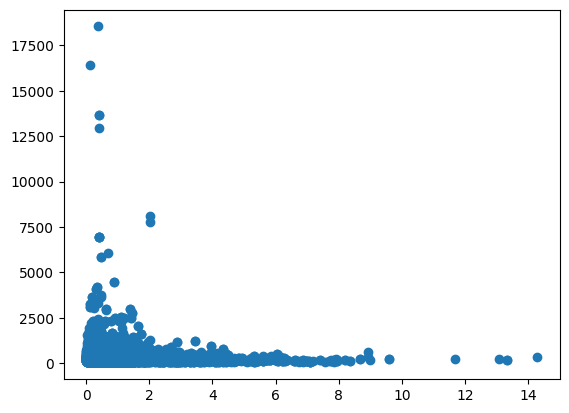

In [91]:
plt.scatter(df['Metro Distance (km)'], df['Price'])

### Histrogramas

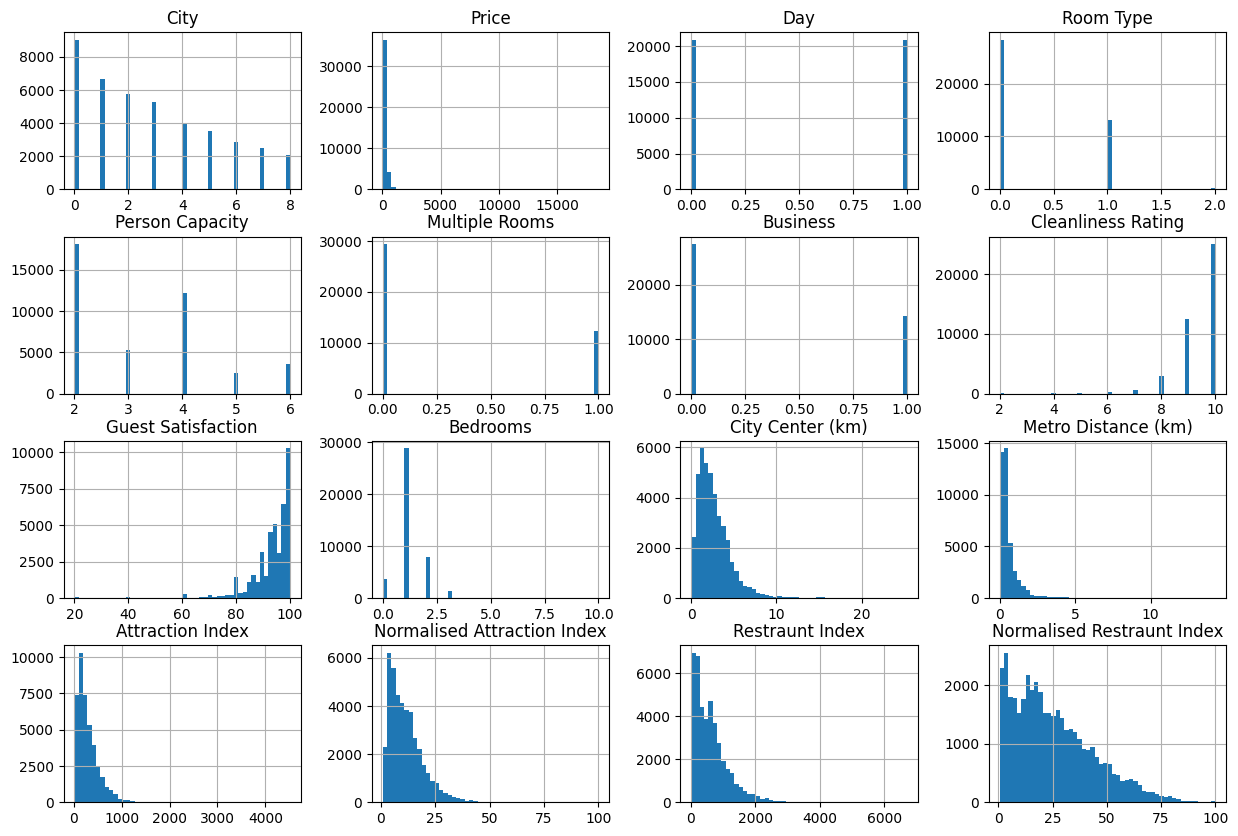

In [98]:
df.hist(bins=50, figsize=(15, 10))
plt.show()